In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("amazon.csv")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert price columns (₹ to numeric)
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

# Convert discount percentage
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)

# Convert ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',','').astype(float)

print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0       

In [5]:
# Split category hierarchy
df['Main_Category'] = df['category'].str.split('|').str[0]
df['Sub_Category'] = df['category'].str.split('|').str[1]

print(df[['Main_Category', 'Sub_Category']].head())


           Main_Category             Sub_Category
0  Computers&Accessories  Accessories&Peripherals
1  Computers&Accessories  Accessories&Peripherals
2  Computers&Accessories  Accessories&Peripherals
3  Computers&Accessories  Accessories&Peripherals
4  Computers&Accessories  Accessories&Peripherals


In [6]:
#Pivot Table: Total Sales by Category
pivot_sales_category = pd.pivot_table(
    df,
    values='discounted_price',
    index='Main_Category',
    aggfunc='sum'
).sort_values(by='discounted_price', ascending=False)

print(pivot_sales_category)


                       discounted_price
Main_Category                          
Electronics                  3138057.00
Home&Kitchen                 1044115.81
Computers&Accessories         381720.62
OfficeProducts                  9349.00
Car&Motorbike                   2339.00
MusicalInstruments              1276.00
Health&PersonalCare              899.00
HomeImprovement                  674.00
Toys&Games                       150.00


In [7]:
#Pivot: Sales by Category & Sub-Category
pivot_category_sub = pd.pivot_table(
    df,
    values='discounted_price',
    index='Main_Category',
    columns='Sub_Category',
    aggfunc='sum',
    fill_value=0
)

print(pivot_category_sub)


Sub_Category           Accessories  Accessories&Peripherals  Arts&Crafts  \
Main_Category                                                              
Car&Motorbike                  0.0                     0.00          0.0   
Computers&Accessories          0.0                185200.62          0.0   
Electronics                11366.0                     0.00          0.0   
Health&PersonalCare            0.0                     0.00          0.0   
Home&Kitchen                   0.0                     0.00          0.0   
HomeImprovement                0.0                     0.00          0.0   
MusicalInstruments             0.0                     0.00          0.0   
OfficeProducts                 0.0                     0.00          0.0   
Toys&Games                     0.0                     0.00        150.0   

Sub_Category           Cameras&Photography  CarAccessories  Components  \
Main_Category                                                            
Car&Motorbike  

In [8]:
# Example: filter Electronics
electronics_data = df[df['Main_Category'] == 'Electronics']
electronics_data.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Main_Category,Sub_Category
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69.0,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,Electronics,"HomeTheater,TV&Video"
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,Electronics,"HomeTheater,TV&Video"
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,21990.0,39.0,4.3,11976.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHBNKB74LGTYUOKPAJBSKNFV45CA,AFIECTV45ADX5YPTE...","NIRMAL.N,Manoj kumar,SOMNATH DAS,Harsha,Pradhu...","R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LG-inches-Ready-Smart-32...,Electronics,"HomeTheater,TV&Video"
21,B085194JFL,tizum HDMI to VGA Adapter Cable 1080P for Proj...,"Electronics|HomeTheater,TV&Video|Accessories|C...",279.0,499.0,44.0,3.7,10962.0,Superior Stability: Built-in advanced Certifie...,"AEO5FHWNOSFBT554DKQAG4ICBGFQ,AGIQ5Y7Q4MKZ542KK...","aditya d.,Paranthaman,ashik rahman c,Rajas c.,...","R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...","Good product ; Average Finishing,Save it purpo...",This connector has provided as a boon for my o...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Adapter-Projector-Comput...,Electronics,"HomeTheater,TV&Video"
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,22900.0,41.0,4.3,16299.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHEVO4Q5NM4YXMG2HDDXC5XMBGRQ,AFZPH7ZAWX5VDY3HO...","Rahman Ali,MARIYA DASS,Md Aftab,roshan s.,Moha...","R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Inches-Wondertai...,Electronics,"HomeTheater,TV&Video"


In [9]:
#Calculated Column: Profit Margin
df['Profit_Margin'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']

pivot_profit_margin = pd.pivot_table(
    df,
    values='Profit_Margin',
    index='Main_Category',
    aggfunc='mean'
)

print(pivot_profit_margin)


                       Profit_Margin
Main_Category                       
Car&Motorbike               0.415250
Computers&Accessories       0.540227
Electronics                 0.508154
Health&PersonalCare         0.526842
Home&Kitchen                0.401169
HomeImprovement             0.579441
MusicalInstruments          0.458083
OfficeProducts              0.123598
Toys&Games                  0.000000


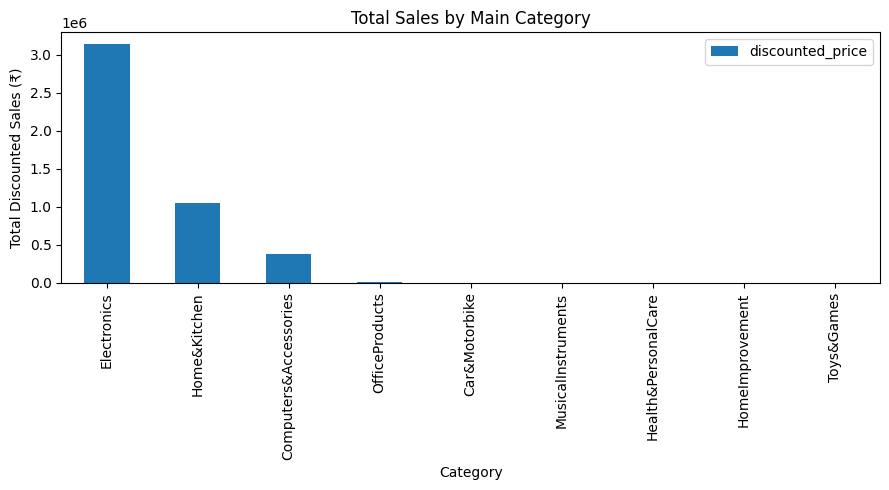

In [10]:
#Pivot Chart: Sales Distribution
import matplotlib.pyplot as plt

pivot_sales_category.plot(
    kind='bar',
    figsize=(9,5),
    title='Total Sales by Main Category'
)

plt.ylabel("Total Discounted Sales (₹)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


In [11]:
#Business Insights (Auto-Generated)
total_sales = df['discounted_price'].sum()

top_category = pivot_sales_category.index[0]
top_category_sales = pivot_sales_category.iloc[0,0]
percentage = (top_category_sales / total_sales) * 100

print(f"{top_category} contributes {percentage:.2f}% of total discounted sales.")
print("Accessories dominate product listings with high rating counts.")
print("Higher discounts do not always guarantee higher ratings.")
print("Electronics show strong demand but thinner margins.")


Electronics contributes 68.54% of total discounted sales.
Accessories dominate product listings with high rating counts.
Higher discounts do not always guarantee higher ratings.
Electronics show strong demand but thinner margins.


In [12]:
#Export Pivot Report as PDF
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("Amazon_Pivot_Report.pdf") as pdf:
    fig, ax = plt.subplots(figsize=(9,5))
    pivot_sales_category.plot(kind='bar', ax=ax)
    ax.set_title("Total Sales by Category")
    pdf.savefig()
    plt.close()
